In [1]:
from model import Net
from dataset import CDEDataset
from torchvision import transforms
import torch
import os
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader


/home/thishen/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
net = Net([(512,2),(512,2),(512,2),(256,2), (128,2), (64,2)], 23, 512)
print(net)

Net(
  (vgg_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [3]:

root_ims = 'ShanghaiTech/ShanghaiTech/part_A/train_data/images'
root_ann = 'ShanghaiTech/ShanghaiTech/part_A/train_data/density_gt'
im_list = os.listdir(root_ims)
train = CDEDataset(im_list,root_ims,root_ann, transform  = transforms.ToTensor())

root_ims = 'ShanghaiTech/ShanghaiTech/part_A/test_data/images'
root_ann = 'ShanghaiTech/ShanghaiTech/part_A/test_data/density_gt'
im_list = os.listdir(root_ims)
test = CDEDataset(im_list,root_ims,root_ann, transform  = transforms.ToTensor())


In [13]:

train_dataloader = DataLoader(train, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test, batch_size=1, shuffle=True)

criterion = nn.MSELoss(reduction='sum')# same as nn.MSELoss(size_average=False)
optimizer = optim.SGD(net.parameters(), lr=1e-7, momentum=0.9)

for epoch in range(3):  # loop over the dataset multiple times
    print(epoch)
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        print(outputs.shape)
        
        print(labels.shape)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        print(loss)
        print(loss.item())
        # print statistics
        running_loss += loss.item()
        if i % 4 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 4))
            running_loss = 0.0

print('Finished Training')


0
<PIL.Image.Image image mode=RGB size=1024x327 at 0x7F43DAFF7310>
torch.Size([1, 1, 20, 64])
torch.Size([1, 1, 20, 64])
tensor(1045.4237, grad_fn=<MseLossBackward>)
1045.4237060546875
[1,     1] loss: 261.356
<PIL.Image.Image image mode=RGB size=628x418 at 0x7F43DB073100>
torch.Size([1, 1, 26, 39])
torch.Size([1, 1, 26, 39])
tensor(6.0696, grad_fn=<MseLossBackward>)
6.069553375244141
<PIL.Image.Image image mode=RGB size=1024x747 at 0x7F440E2D4B20>
torch.Size([1, 1, 46, 64])
torch.Size([1, 1, 46, 64])
tensor(2.5969, grad_fn=<MseLossBackward>)
2.5968918800354004
<PIL.Image.Image image mode=RGB size=1024x683 at 0x7F43DB073160>
torch.Size([1, 1, 42, 64])
torch.Size([1, 1, 42, 64])
tensor(1.8463, grad_fn=<MseLossBackward>)
1.8463032245635986
<PIL.Image.Image image mode=RGB size=1024x686 at 0x7F43DAFCB670>
torch.Size([1, 1, 42, 64])
torch.Size([1, 1, 42, 64])
tensor(38.3491, grad_fn=<MseLossBackward>)
38.34911346435547
[1,     5] loss: 12.215
<PIL.Image.Image image mode=RGB size=1024x681 at

tensor(432.4382, grad_fn=<MseLossBackward>)
432.4382019042969
[1,    45] loss: 223.988
<PIL.Image.Image image mode=RGB size=1024x728 at 0x7F43DB038820>
torch.Size([1, 1, 45, 64])
torch.Size([1, 1, 45, 64])
tensor(2.5226, grad_fn=<MseLossBackward>)
2.522618293762207
<PIL.Image.Image image mode=RGB size=605x328 at 0x7F440E5505E0>
torch.Size([1, 1, 20, 37])
torch.Size([1, 1, 20, 37])
tensor(3.1950, grad_fn=<MseLossBackward>)
3.194972515106201
<PIL.Image.Image image mode=RGB size=1024x768 at 0x7F43DB038820>
torch.Size([1, 1, 48, 64])
torch.Size([1, 1, 48, 64])
tensor(46.9496, grad_fn=<MseLossBackward>)
46.949581146240234
<PIL.Image.Image image mode=RGB size=1024x683 at 0x7F440E2D4AC0>
torch.Size([1, 1, 42, 64])
torch.Size([1, 1, 42, 64])
tensor(1.3577, grad_fn=<MseLossBackward>)
1.3577156066894531
[1,    49] loss: 13.506
<PIL.Image.Image image mode=RGB size=1024x683 at 0x7F44C508FB20>
torch.Size([1, 1, 42, 64])
torch.Size([1, 1, 42, 64])
tensor(7.5933, grad_fn=<MseLossBackward>)
7.59330654

tensor(0.4184, grad_fn=<MseLossBackward>)
0.41844260692596436
<PIL.Image.Image image mode=RGB size=1024x594 at 0x7F440E5500D0>
torch.Size([1, 1, 37, 64])
torch.Size([1, 1, 37, 64])
tensor(0.7726, grad_fn=<MseLossBackward>)
0.7726055979728699
<PIL.Image.Image image mode=RGB size=1024x683 at 0x7F44C508FB20>
torch.Size([1, 1, 42, 64])
torch.Size([1, 1, 42, 64])
tensor(6.4270, grad_fn=<MseLossBackward>)
6.426951885223389
[2,    41] loss: 1.963
<PIL.Image.Image image mode=RGB size=1024x683 at 0x7F43DB073100>
torch.Size([1, 1, 42, 64])
torch.Size([1, 1, 42, 64])
tensor(0.3123, grad_fn=<MseLossBackward>)
0.3122735023498535
<PIL.Image.Image image mode=RGB size=720x480 at 0x7F43DB0387F0>
torch.Size([1, 1, 30, 45])
torch.Size([1, 1, 30, 45])
tensor(3.3145, grad_fn=<MseLossBackward>)
3.314462661743164
<PIL.Image.Image image mode=RGB size=634x426 at 0x7F44C508FB20>
torch.Size([1, 1, 26, 39])
torch.Size([1, 1, 26, 39])
tensor(0.9210, grad_fn=<MseLossBackward>)
0.9209917187690735
<PIL.Image.Image im

torch.Size([1, 1, 45, 64])
torch.Size([1, 1, 45, 64])
tensor(0.8959, grad_fn=<MseLossBackward>)
0.8959146738052368
<PIL.Image.Image image mode=RGB size=709x469 at 0x7F43DB6EC970>
torch.Size([1, 1, 29, 44])
torch.Size([1, 1, 29, 44])
tensor(2.3405, grad_fn=<MseLossBackward>)
2.340515613555908
<PIL.Image.Image image mode=RGB size=605x328 at 0x7F44C508FAC0>
torch.Size([1, 1, 20, 37])
torch.Size([1, 1, 20, 37])
tensor(0.2123, grad_fn=<MseLossBackward>)
0.2122880220413208
<PIL.Image.Image image mode=RGB size=1024x576 at 0x7F43DB6EC970>
torch.Size([1, 1, 36, 64])
torch.Size([1, 1, 36, 64])
tensor(0.7670, grad_fn=<MseLossBackward>)
0.766991913318634
[3,    37] loss: 1.054
<PIL.Image.Image image mode=RGB size=1017x798 at 0x7F44C508FB20>
torch.Size([1, 1, 49, 63])
torch.Size([1, 1, 49, 63])
tensor(1.0355, grad_fn=<MseLossBackward>)
1.0355188846588135
<PIL.Image.Image image mode=RGB size=488x294 at 0x7F43DB6EC970>
torch.Size([1, 1, 18, 30])
torch.Size([1, 1, 18, 30])
tensor(9.0587, grad_fn=<MseL

In [ ]:
def show_tensor_image(f):
    plt.imshow(f.permute(1, 2, 0))

In [32]:
im =train[5][0].unsqueeze(0)
im.shape
a = net(im)


<PIL.Image.Image image mode=RGB size=680x453 at 0x7F43D827A0A0>


In [15]:
im.shape

torch.Size([1, 3, 164, 302])

In [26]:
train[5][1].unsqueeze(0).shape

<PIL.Image.Image image mode=RGB size=680x453 at 0x7F43D8230250>


torch.Size([1, 1, 28, 42])

In [27]:
a.shape


torch.Size([1, 1, 20, 37])

In [28]:

shapes = []

for i in range(10):
    tr = train[i]
    im = tr[0].unsqueeze(0)
    out = net(im)
    shapes.append((im.shape[2]/out.shape[2], im.shape[3]/out.shape[3]))

<PIL.Image.Image image mode=RGB size=849x565 at 0x7F43D832FAF0>
<PIL.Image.Image image mode=RGB size=464x183 at 0x7F43D81F0310>
<PIL.Image.Image image mode=RGB size=605x328 at 0x7F43D81F0850>
<PIL.Image.Image image mode=RGB size=377x282 at 0x7F43D81F0490>
<PIL.Image.Image image mode=RGB size=1024x681 at 0x7F43D81F0790>
<PIL.Image.Image image mode=RGB size=680x453 at 0x7F43D81F0790>
<PIL.Image.Image image mode=RGB size=1024x561 at 0x7F43D81F0790>


KeyboardInterrupt: 

In [29]:
shapes

[(8.057142857142857, 8.0),
 (8.272727272727273, 8.0),
 (8.2, 8.162162162162161),
 (8.294117647058824, 8.173913043478262),
 (8.095238095238095, 8.0),
 (8.071428571428571, 8.095238095238095)]

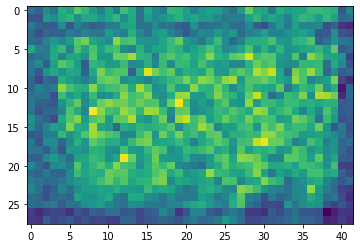

In [33]:
plt.imshow(a[0][0].detach().numpy())

In [34]:
sum(sum(a[0][0].detach().numpy()))

27.493803322315216

In [35]:
a[0][0].detach().numpy().shape

(28, 42)

In [38]:
sum(sum(train[5][1][0].detach().numpy()))

<PIL.Image.Image image mode=RGB size=680x453 at 0x7F43D8B9A430>


27.881616920232773

<PIL.Image.Image image mode=RGB size=605x328 at 0x7F43D819C820>


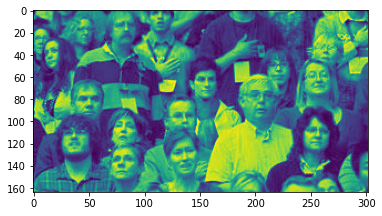

In [37]:
plt.imshow(train[2][0][0].detach().numpy())

In [11]:
train[23][0].unsqueeze(0).shape

<PIL.Image.Image image mode=RGB size=442x293 at 0x7F44C508FB20>


torch.Size([1, 3, 146, 221])

In [ ]:
gt = train[23][1].unsqueeze(0)

In [ ]:
gt.shape

In [ ]:
a.shape

In [ ]:
torch.sum(torch.square(gt - a))